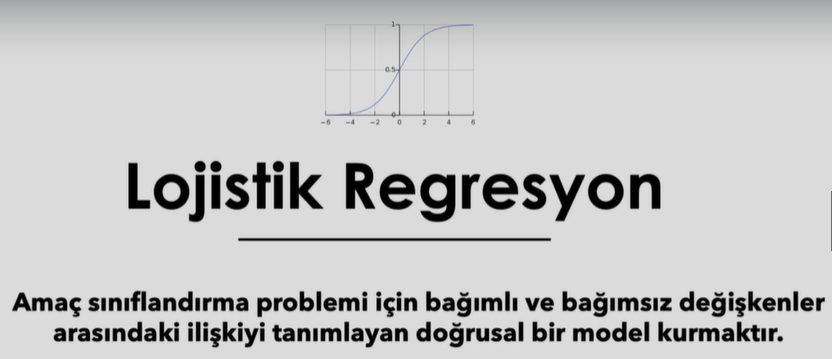

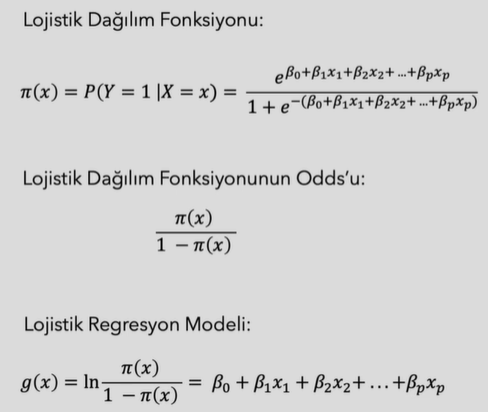

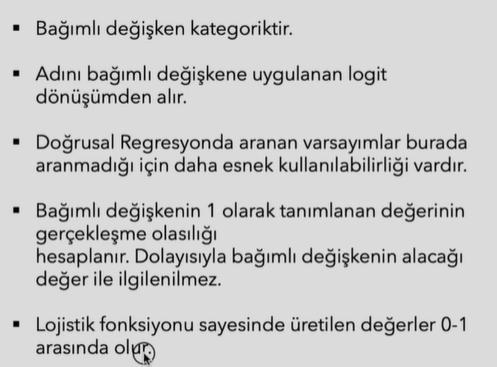

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon

# Model

In [3]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

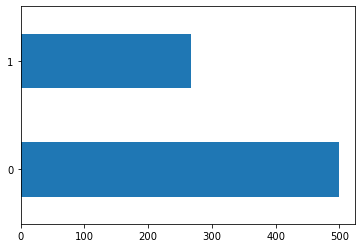

In [10]:
df["Outcome"].value_counts().plot.barh();

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)

## Statsmodels

In [14]:
loj=sm.Logit(y,X)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 05 Jan 2022   Pseudo R-squ.:                 0.05922
Time:                        11:45:28   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

## Scikit-learn

In [16]:
from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X,y)
loj_model 

LogisticRegression(solver='liblinear')

In [19]:
loj_model.intercept_#sabit degerini almış olduk 

array([-5.89159518])

In [21]:
#bütün bagımsız degişkenlerin katsayı degerlerini alma işlemini gerçekleştirdik
loj_model.coef_

array([[ 1.17052230e-01,  2.83873955e-02, -1.68897224e-02,
         7.55274087e-04, -6.42755924e-04,  5.97603789e-02,
         6.77671880e-01,  7.23947807e-03]])

# Lojistik Regersyon Tahmin & Model Tuning

In [23]:
#tune etme tam degil dogrulama modeli gibi yapıyoruz
y_pred=loj_model.predict(X)


In [24]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [25]:
accuracy_score(y,y_pred)

0.7747395833333334

In [29]:
print(classification_report(y,y_pred))#print yazma sebebi =daha güzel çıktı verdigi için

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [30]:
loj_model.predict(X)[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [32]:
loj_model.predict_proba(X)[0:10]#x kullanarak model kur ama bana onunla ilgili olasılık degerlerini ver bana 

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

In [35]:
loj_model.predict(X)[0:10]#bunlar tahmin ettigimiz degerler 

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [36]:
loj_model.predict_proba(X)[0:10][:,0:2] #bunlar ise olasılık degerleri 

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

In [34]:
y[0:10]#bunlar gerçek degerler

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [39]:
# loj_model.predict_proba(X)[0:10][:,0:2] =>bu sütündaki degerleri yakalayıp döngüye katmaya çalışıcaz 
y_probs=loj_model.predict_proba(X)#bütün degerleri kaydettik
y_probs=y_probs[:,1] # [:,1] =>tüm gözlemeleri ve 1'i seç

In [40]:
#dogrulama yapıyoruz olasıkları bir listeye topladık mı diye
y_probs[0:10]

array([0.64959289, 0.08298071, 0.77525915, 0.07861124, 0.8327758 ,
       0.20101325, 0.11980894, 0.7218731 , 0.67939057, 0.07727116])

In [41]:
#bulunan olasılık degerlerini sınır degerler vererek yukarı aşagı şeklinde sınıflandırma işlemine tabi tutucaz 
y_pred=[1 if i>0.5 else 0 for i in y_probs ] #liste yapıcaz ama döngü olacak içinde

In [42]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [43]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [44]:
accuracy_score(y,y_pred)#ilkelin ilkeli hatası 

0.7747395833333334

In [45]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



rock aus degerine /egerisine bakalım

dogru yaptıgımız işler bölü tüm yaptıgımız işler  

In [46]:
loj_model.predict_proba(X)[:,1]

array([0.64959289, 0.08298071, 0.77525915, 0.07861124, 0.8327758 ,
       0.20101325, 0.11980894, 0.7218731 , 0.67939057, 0.07727116,
       0.22079882, 0.84278751, 0.70729426, 0.63332812, 0.59883327,
       0.52970942, 0.32341784, 0.24616749, 0.39378251, 0.25474592,
       0.36612573, 0.30509883, 0.87572297, 0.33994379, 0.6288757 ,
       0.47130165, 0.65861242, 0.0879755 , 0.55238363, 0.26942168,
       0.37673053, 0.54951168, 0.09743211, 0.06836013, 0.44283492,
       0.21694313, 0.63456922, 0.3897174 , 0.19778066, 0.4946219 ,
       0.70390599, 0.60502442, 0.14929811, 0.83407254, 0.61932239,
       0.8915455 , 0.4479956 , 0.0708175 , 0.39061996, 0.15301907,
       0.06946994, 0.14519084, 0.11765919, 0.75102175, 0.67860508,
       0.05496029, 0.83803555, 0.29081935, 0.69291299, 0.2149057 ,
       0.0514215 , 0.50892749, 0.04964078, 0.37151765, 0.3747833 ,
       0.16477128, 0.1878129 , 0.35393511, 0.06733063, 0.33010388,
       0.22796249, 0.41846373, 0.72702127, 0.27853754, 0.08046

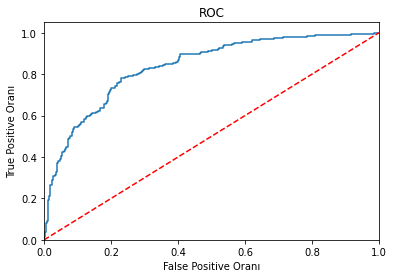

In [47]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [48]:
#test train ayırma işlemi

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)

In [50]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [53]:
accuracy_score(y_test,loj_model.predict(X_test))#sınama seti yaklaşımını kullanmış olduk 

0.7447916666666666

In [55]:
cross_val_score(loj_model,X_test,y_test,cv=10)#10 adet hesaplama işlemi getirdi bize

array([0.7       , 0.75      , 0.89473684, 0.73684211, 0.84210526,
       0.73684211, 0.89473684, 0.68421053, 0.68421053, 0.47368421])

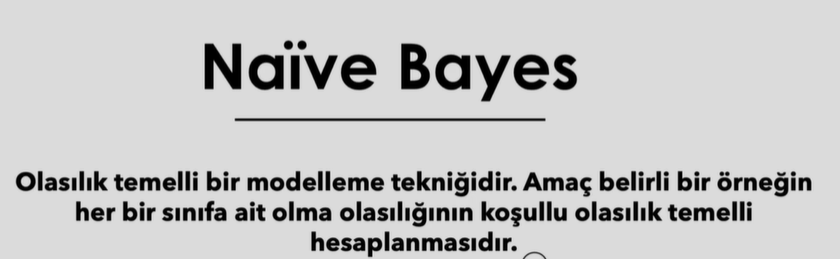

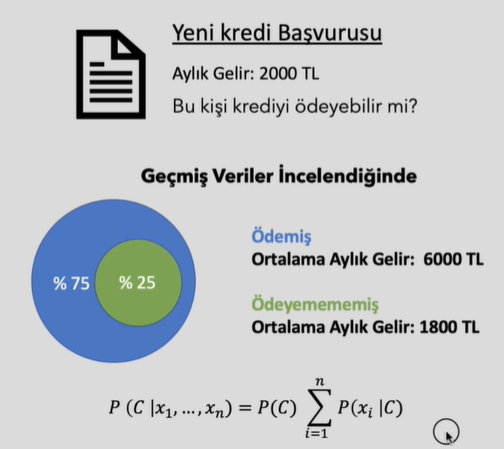

In [56]:
df = diabetes.copy()
df = df.dropna()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)
#25 den 30 çevirme işlemi dengesiz test setinden dolayı yapıyoruz 
#ilgilendigimiz sınıflar arasında dengesizlik varsa buna bakmak gerekiyor
#bagımlı degişkenin sınıfları olan 0 ve 1 in degerleri birbirinden çok farklı ise

In [57]:
from sklearn.naive_bayes import GaussianNB

In [59]:
#model kurma işlemi yaptık 
nb=GaussianNB()
nb_model=nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [60]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [62]:
nb_model.predict_proba(X_test)[0:10]#olasılık degerlerine erişebiliriz

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [63]:
#test hatasını hesaplamak istersek 
y_pred=nb_model.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [68]:
#test hatasının dogrulanmış hali ise
#nb model için model tuning yapmak dogru degil bir dışsal bir hiperparamtresi yok ,önsel olasılık degerler var ise yapılabilir 
#nb model için sadece model tuning~model dogrulamak oldugu aklımıza gelmesi lazım 

In [67]:
cross_val_score(nb_model,X_test,y_test,cv=10).mean()

0.775

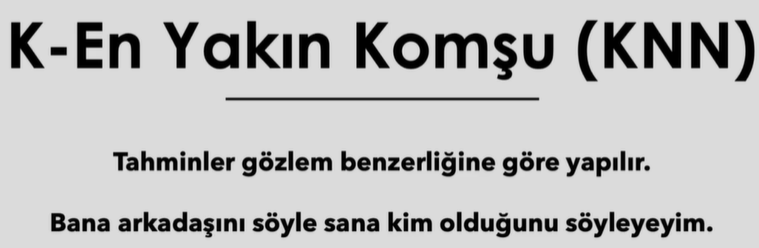

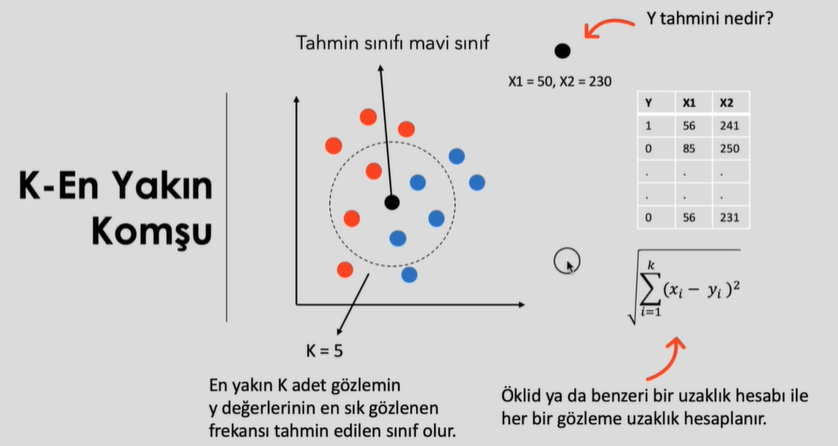

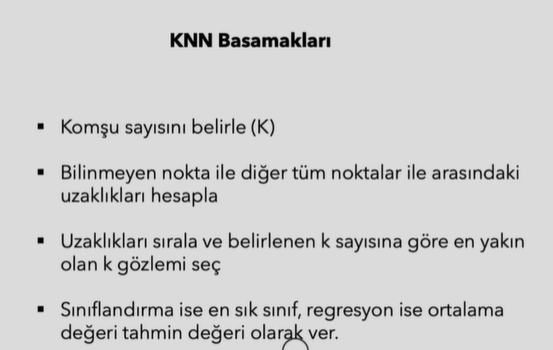

# KNN Model & Tahmin

In [4]:
df = diabetes.copy()
df = df.dropna()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [6]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [7]:
y_pred=knn_model.predict(X_test)

In [10]:
accuracy_score(y_test,y_pred)#ilkel test hatamız

0.6883116883116883

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# KNN - Model Tuning

In [12]:
knn_params={"n_neighbors":np.arange(1,50)}

In [14]:
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [16]:
print("En iyi skor:"+str(knn_cv.best_score_))
print("En iyi parametreler:"+str(knn_cv.best_params_))#bunun parmateresini alıp final modeli oluşturma işlemi yapıcaz 

En iyi skor:0.748637316561845
En iyi parametreler:{'n_neighbors': 11}


In [18]:
knn=KNeighborsClassifier(11)
knn_tuned=knn.fit(X_train,y_train)

In [19]:
knn_tuned.score(X_test,y_test)

0.7316017316017316

In [21]:
y_pred=knn_tuned.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.7316017316017316

# Destek Vektör Makineleri 

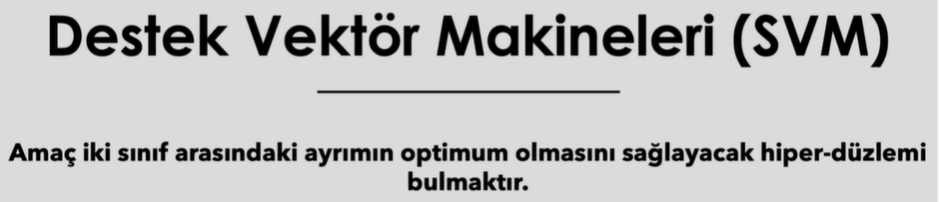

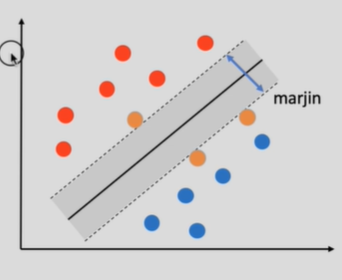

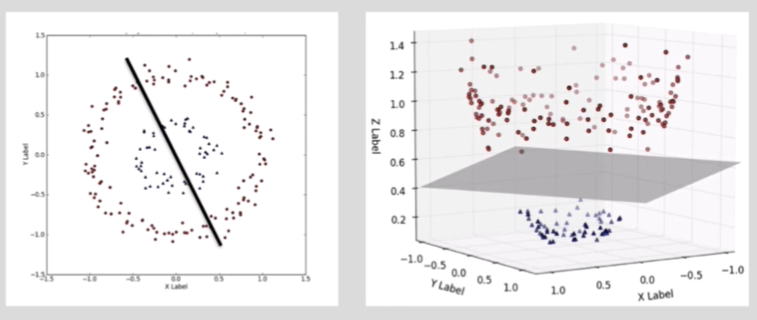

# SVC -model & tahmin

In [3]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [4]:
svm_model=SVC(kernel="linear").fit(X_train,y_train)

In [5]:
svm_model

SVC(kernel='linear')

In [6]:
y_pred=svm_model.predict(X_test)

In [8]:
accuracy_score(y_test,y_pred)

0.7445887445887446

# SVC Model Tuning 

In [13]:

#c 0 olmamlı yoksa hata alırız 

svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)
#n_jobs=-1 =>bütün işlemciler tam performansla çalışşsın
#verbose=2 =>çıktıları gözlemleyebilmek adına yapılıyor 

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.0min finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [14]:
print("En iyi paramtereler:"+str(svc_cv_model.best_params_))

En iyi paramtereler:{'C': 5}


In [15]:
svc_tuned=SVC(kernel="linear",C=5).fit(X_train,y_train)

In [16]:
y_pred=svc_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

# RBF SVC - Model & Tahmin

In [3]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [19]:
#model nesnemizi oluşturalım 
svc_model=SVC(kernel="rbf").fit(X_train,y_train)

In [20]:
svc_model

SVC()

In [23]:
#ilkel test hatasını hesaplama 
y_pred=svc_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

# SVC-Model Tuning 

In [24]:
svc_params={"C":[0.0001,0.001,0.1,1,5,10,50,100],
           "gamma":[0.0001,0.001,0.1,1,5,10,50,100]}

In [30]:
svc=SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    5.3s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [32]:
print("En iyi paramtreler:"+str(svc_cv_model.best_params_))

En iyi paramtreler:{'C': 10, 'gamma': 0.0001}


In [33]:
svc=SVC(C=10,gamma=0.0001).fit(X_train,y_train)

In [34]:
y_pred=svc_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

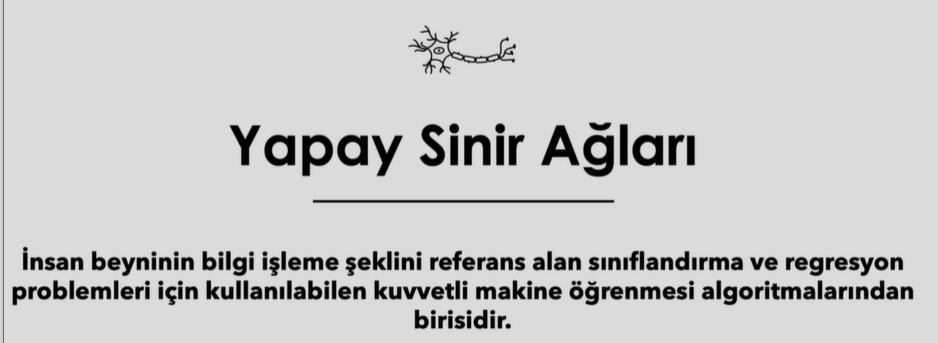

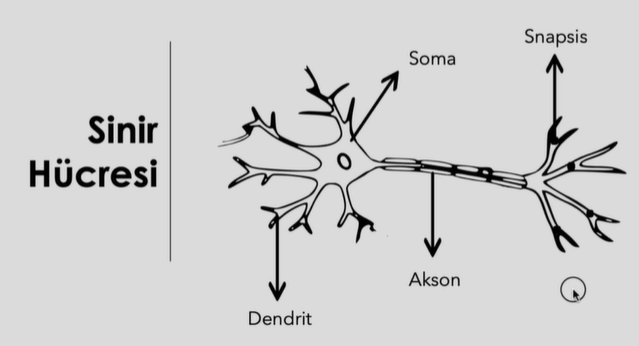

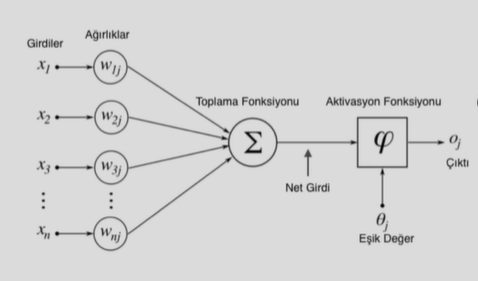

In [4]:
df = diabetes.copy()
df = df.dropna()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
mlpc=MLPClassifier().fit(X_train_scaled,y_train)

In [16]:
mlpc.coefs_
#dir(mlpc) =>modelin katmanlarına erişebiliriz burada 

[array([[-3.75495738e-01,  2.22478587e-02,  2.97443561e-02,
          1.30906465e-01, -7.41219934e-02,  1.42178421e-01,
         -1.21408243e-02,  1.80883282e-01,  1.05282254e-01,
         -1.61088539e-01, -1.94469199e-01, -2.24696698e-01,
          4.28353554e-02,  2.38590311e-01,  1.94092034e-01,
          1.10763709e-02, -3.81953897e-02, -3.40800490e-01,
          6.31925322e-03,  5.15789024e-02,  2.81862727e-01,
         -4.19029461e-02,  9.22673516e-02, -2.58570413e-02,
         -5.52389300e-02, -2.27302204e-01,  2.50782095e-01,
          1.33364877e-01,  1.39249150e-01,  3.10638704e-01,
         -3.71680168e-01,  2.66459433e-01,  2.90722008e-01,
         -1.30008070e-01,  8.47530411e-02, -2.66483843e-01,
         -1.65653679e-01, -2.40912086e-02, -1.03551654e-01,
         -1.14609773e-01, -2.05946452e-01,  9.50279060e-02,
          2.72284534e-01,  2.92603608e-01,  2.49940655e-01,
         -2.84695584e-01, -2.03364846e-01, -1.78792722e-01,
         -2.37559899e-01,  4.51832800e-0

In [17]:
y_pred=mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7316017316017316

# Model Tuning 

In [23]:
mlpc
# hidden_layer_sizes(100,) =>100 tane sinir agı var demektir, ","den sonra sayı varsa iki hücreli oldugunu anlarız ve ayrı ayrı kaçar tane katmanı var onu anlarız,3. degeride yazarsak agımızın 3 katmanlı olacagını bilgisini programa gönderir

MLPClassifier()

In [19]:
?mlpc
#soru işareti nesne her ne ise buna ait özlliklere erişebiliyoruz

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='

In [34]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [35]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  5.6min finished


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [36]:
print("En iyi parametreler:"+str(mlpc_cv_model.best_params_))

En iyi parametreler:{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (3, 5), 'solver': 'lbfgs'}


In [39]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [40]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [41]:
y_pred=mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7359307359307359

# CART

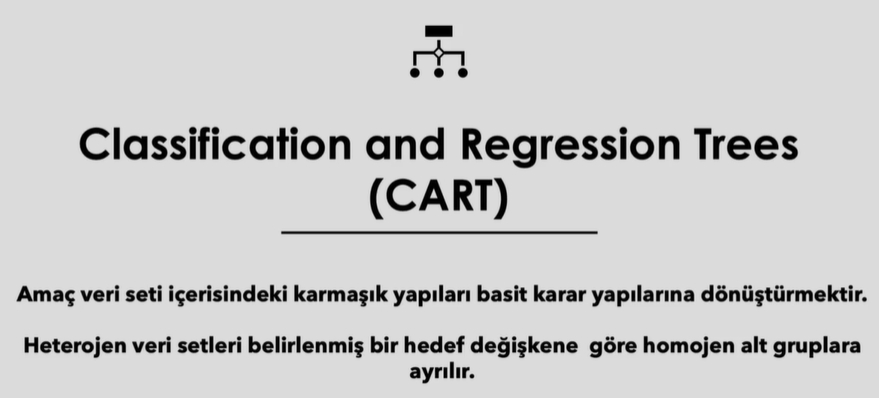

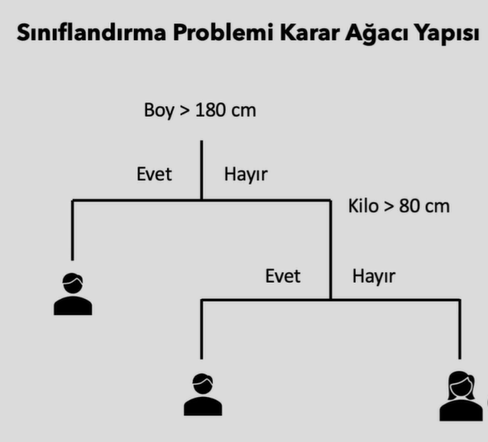

# CART Model-Tahmin 

In [42]:
df = diabetes.copy()
df = df.dropna()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)

In [45]:
cart_model

DecisionTreeClassifier()